# C515 - Deep Learning - 2022
## Homework 2 - 100 pts


## Goal

The goal of this homework is two-fold:

*   Introduction to the Transfer Learning
*   Gain experience with three dimensional input data (colored images), and pretrained models (Part-A)

## Dataset
[**CelebA**](https://www.cs.toronto.edu/~kriz/cifar.html) is a large-scale face attributes dataset with more than 200K celebrity images, each with 40 attribute annotations. The images in this dataset cover large pose variations and background clutter.

**Download the data from Sucourse and upload it to your Google drive. In your Google drive, you need to have CelebA30k.zip and CelebA30k.csv uploaded. (Do not change the name of these files.) Reserve 10% of the training data for validation and %10 for test** and  **use the rest for development (learning your models). The test data (3000 samples) should only be used for testing at the end, and not model selection.**

## Task
Build a classifier with the PyTorch library function calls and pretrained models to *classify gender* in the CelebA dataset, completing the given code and without changing the network.


## Software:

Pytorch is a library that we will use especially for deep learning, but also with basic neural network functionality of course.

You may find the necessary function references here:

https://pytorch.org/

https://pytorch.org/vision/stable/index.html

https://pytorch.org/docs/stable/torch.html

https://pytorch.org/docs/stable/nn.html

## Submission:
Fill this notebook. Follow the submission/answer requirements in SuCourse.

##1) Initialize

*   First make a copy of the notebook given to you as a starter.

*   Make sure you choose Connect form upper right.

*   Make sure you change your runtime to GPU.


## 2) Load training dataset




In [ ]:
# load data
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
# import the necessary libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.io
from numpy import random
from PIL import Image
from sklearn.model_selection import train_test_split
import cv2
import os


import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
np.random.seed(5)

%matplotlib inline

In [ ]:
IMG_SIZE = (128,128)

In [ ]:
data = pd.read_csv('/content/drive/My Drive/Colab Notebooks/CS_515_HW2/celeba_30k.csv') # enter the file path on your drive for the csv file
data.head()

,image_id,Male,Blond_Hair,Eyeglasses,Wearing_Earrings,Bangs,Young,Smiling,Heavy_Makeup,Straight_Hair,Black_Hair
0,000001.jpg,0,0,0,1,0,1,1,1,1,0
1,000002.jpg,0,0,0,0,0,1,1,0,0,0
2,000003.jpg,1,0,0,0,0,1,0,0,0,0
3,000004.jpg,0,0,0,1,0,1,0,0,1,0
4,000005.jpg,0,0,0,0,0,1,0,1,0,0


In [ ]:
gender_data = data[['image_id', 'Male']].copy()
gender_data.head()

,image_id,Male
0,000001.jpg,0
1,000002.jpg,0
2,000003.jpg,1
3,000004.jpg,0
4,000005.jpg,0


In [ ]:
#this will extract the contents of the zip file into a folder named data
#do not extract the zip into your google drive (i.e don't use drive/My Drive in the right path since it slows down the process)
#only change the left path

!unzip "/content/drive/My Drive/Colab Notebooks/CS_515_HW2/celeba_30k.zip" -d "/content/data"

Streaming output truncated to the last 5000 lines.
  inflating: /content/data/celeba_30k/025001.jpg  
  inflating: /content/data/celeba_30k/025002.jpg  
  inflating: /content/data/celeba_30k/025003.jpg  
  inflating: /content/data/celeba_30k/025004.jpg  
  inflating: /content/data/celeba_30k/025005.jpg  
  inflating: /content/data/celeba_30k/025006.jpg  
  inflating: /content/data/celeba_30k/025007.jpg  
  inflating: /content/data/celeba_30k/025008.jpg  
  inflating: /content/data/celeba_30k/025009.jpg  
  inflating: /content/data/celeba_30k/025010.jpg  
  inflating: /content/data/celeba_30k/025011.jpg  
  inflating: /content/data/celeba_30k/025012.jpg  
  inflating: /content/data/celeba_30k/025013.jpg  
  inflating: /content/data/celeba_30k/025014.jpg  
  inflating: /content/data/celeba_30k/025015.jpg  
  inflating: /content/data/celeba_30k/025016.jpg  
  inflating: /content/data/celeba_30k/025017.jpg  
  inflating: /content/data/celeba_30k/025018.jpg  
  inflating: /content/data/cele

In [ ]:
first_image_path = os.path.join("/content/data/celeba_30k/", gender_data.loc[0,"image_id"])
img = Image.open(first_image_path)

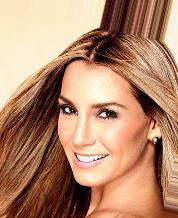

In [ ]:
img

##3) Visualizing/Understanding the dataset

- Display five random images together with their labels

- Display statistics about the dataset, such as its memory usage, distribution of labels, etc.


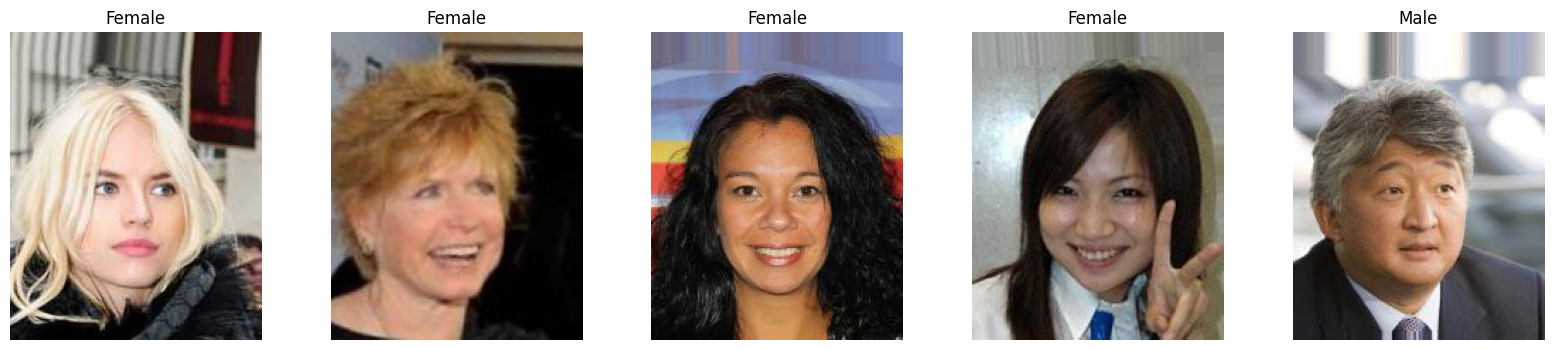

In [ ]:
# plot random 5 images in your dataset with their labels

# Randomly selecting five celebrities
celeb_indices = random.sample(range(len(gender_data)), 5)

# Creating a figure with five columns
fig, axes = plt.subplots(1, 5, figsize=(20, 4))

# For each celebrity, displaying their image in the appropriate column
for i, idx in enumerate(celeb_indices):
    image_path = os.path.join("/content/data/celeba_30k/", gender_data.loc[idx, "image_id"])
    img = Image.open(image_path)
    axes[i].imshow(img)
    axes[i].set_title("Male" if gender_data.loc[idx, "Male"] == 1 else "Female")
    axes[i].axis("off")

# Showing the completed figure
plt.show()


In [ ]:
#displaying the memory usage
print("Memory Usage: ")
print(data.memory_usage().sum() / 1024 / 1024, "MB")

Memory Usage: 
2.517822265625 MB


In [ ]:
#displaying the distribution of labels
print("Distribution of labels: ")
print(gender_data["Male"].value_counts())

Distribution of labels: 
0    17320
1    12680
Name: Male, dtype: int64


In [ ]:
data.info

<bound method DataFrame.info of          image_id  Male  Blond_Hair  Eyeglasses  Wearing_Earrings  Bangs  \
0      000001.jpg     0           0           0                 1      0   
1      000002.jpg     0           0           0                 0      0   
2      000003.jpg     1           0           0                 0      0   
3      000004.jpg     0           0           0                 1      0   
4      000005.jpg     0           0           0                 0      0   
...           ...   ...         ...         ...               ...    ...   
29995  029996.jpg     1           0           0                 0      0   
29996  029997.jpg     1           0           0                 0      0   
29997  029998.jpg     0           0           0                 0      0   
29998  029999.jpg     0           0           0                 0      0   
29999  030000.jpg     1           0           1                 0      0   

       Young  Smiling  Heavy_Makeup  Straight_Hair  Bla

In [ ]:
data.columns

Index(['image_id', 'Male', 'Blond_Hair', 'Eyeglasses', 'Wearing_Earrings',
       'Bangs', 'Young', 'Smiling', 'Heavy_Makeup', 'Straight_Hair',
       'Black_Hair'],
      dtype='object')

In [ ]:
#displaying some statistics about the dataset

#Percentage of images with straight hair
straight_hair_pct = (data["Straight_Hair"].sum() / len(data)) * 100
print("Straight Hair Percentage:", straight_hair_pct, "%")

#Percentage of images with black hair
black_hair_pct = (data["Black_Hair"].sum() / len(data)) * 100
print("Black Hair Percentage:", black_hair_pct, "%")

#Percentage of images with blong hair
blond_hair_pct = (data["Blond_Hair"].sum() / len(data)) * 100
print("Blond Hair Percentage:", blond_hair_pct, "%")

#Percentage of Eyeglasses
eyeglasses_pct = (data["Eyeglasses"].sum() / len(data)) * 100
print("Eyeglasses Percentage:", eyeglasses_pct, "%")

#Percentage of Earrings
earrings_pct = (data["Wearing_Earrings"].sum() / len(data)) * 100
print("Earrings Percentage:", earrings_pct, "%")

#Percentage of Young
young_pct = (data["Young"].sum() / len(data)) * 100
print("Young Percentage:", young_pct, "%")

Straight Hair Percentage: 21.023333333333333 %
Black Hair Percentage: 24.14 %
Blond Hair Percentage: 14.67 %
Eyeglasses Percentage: 6.486666666666667 %
Earrings Percentage: 18.543333333333333 %
Young Percentage: 77.93333333333334 %


##4) Split the dataset as train (also called development) (80%) and validation (10%) and test (10%) set. You'll tune the hyperparameters using the validation set and evaulate the model on the unseen test set.

In [ ]:
gender_data


,image_id,Male
0,000001.jpg,0
1,000002.jpg,0
2,000003.jpg,1
3,000004.jpg,0
4,000005.jpg,0
...,...,...
29995,029996.jpg,1
29996,029997.jpg,1
29997,029998.jpg,0
29998,029999.jpg,0


In [ ]:
# Split 80-10-10
from sklearn.model_selection import train_test_split
train_df, val_df = train_test_split(gender_data, test_size=0.1, random_state=42, shuffle = True)
train_df, test_df = train_test_split(train_df, test_size=1/9, random_state=42, shuffle = True) #since 0.9 * (1/9) = 0.1

In [ ]:
from torch.utils.data import Dataset
import torchvision.transforms as transforms
from torchvision.io import read_image

class CelebADataset(nn.Module):
    def __init__(self, root_dir, img_pths, labels, is_train):
        self.root_dir = root_dir
        self.img_pths = img_pths
        self.labels = labels
        if not is_train:
            self.transform = transforms.Compose([
                transforms.Resize(IMG_SIZE),
                transforms.ToTensor(),
                transforms.Normalize(
                    mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
                ])
        else:
            self.transform = transforms.Compose([
                transforms.Resize(IMG_SIZE),
                transforms.RandomHorizontalFlip(),
                transforms.ColorJitter(0.3, 0.3, 0.3, 0.3),
                transforms.RandomGrayscale(),
                transforms.ToTensor(),
                transforms.Normalize(
                    mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
            ])

    def __len__(self):
        return len(self.img_pths)

    def __getitem__(self, idx):
        img_pth = os.path.join(self.root_dir, self.img_pths[idx])
        image = Image.open(img_pth)
        label = self.labels[idx]
        label = torch.tensor(label, dtype=torch.long)
        if self.transform:
            image = self.transform(image)
        sample = {"img": image, "label": label}
        return sample


# Prepare Datasets

root_dir = "/content/data/celeba_30k/"

train_img_pths = np.array(train_df["image_id"])
train_img_labels = np.array(train_df["Male"])

val_img_pths = np.array(val_df["image_id"])
val_img_labels = np.array(val_df["Male"])

test_img_pths = np.array(test_df["image_id"])
test_img_labels = np.array(test_df["Male"])

train_dataset = CelebADataset(root_dir, train_img_pths, train_img_labels, True)
val_dataset = CelebADataset(root_dir, val_img_pths, val_img_labels, False)
test_dataset = CelebADataset(root_dir, test_img_pths, test_img_labels, False)



In [ ]:
train_dataset[0]

{'img': tensor([[[-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
          [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
          [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
          ...,
          [-1.8268, -1.8610, -1.8610,  ...,  1.8037,  1.8037,  1.8037],
          [-1.8097, -1.8097, -1.8097,  ...,  1.7009,  1.7009,  1.7009],
          [-1.7925, -1.7925, -1.7925,  ...,  1.6667,  1.6667,  1.6667]],
 
         [[-2.0357, -2.0357, -2.0357,  ..., -1.9657, -1.9657, -1.9657],
          [-2.0357, -2.0357, -2.0357,  ..., -1.9657, -1.9657, -1.9657],
          [-2.0357, -2.0357, -2.0357,  ..., -1.9657, -1.9657, -1.9657],
          ...,
          [-1.6155, -1.6331, -1.6331,  ...,  2.2360,  2.2360,  2.2360],
          [-1.5805, -1.5805, -1.5805,  ...,  2.0784,  2.0784,  2.0784],
          [-1.5630, -1.5630, -1.5630,  ...,  2.0609,  2.0609,  2.0609]],
 
         [[-1.8044, -1.8044, -1.8044,  ..., -1.7522, -1.7522, -1.7522],
          [-1.8044, -

##5) Transfer Learning with VGG-16

We will create the base model from the well-known VGG-16 model. This is pre-trained on ImageNet dataset, a large dataset consisting of 1.4M images and 1000 classes.

First, you need to pick which layer of VGG-16 you will use for feature extraction, which is the features section.

By setting the requires_grad to False, we ensure that the original (ImageNet) weights of the model will remain constant.

Note that it is possible to adjust the number of trainable layers by modifying the for loop.


In [ ]:
import torchvision.models as models
from torchvision.models import vgg16

class VGG16_Updated(nn.Module):
    def __init__(self, num_classes):
        super(VGG16_Updated, self).__init__()
        self.featurizer = models.vgg16(pretrained=True).features

        for n, p in self.featurizer.named_parameters():
            p.requires_grad = False

        self.avgpool = nn.AdaptiveAvgPool2d((7, 7))
        self.clf = nn.Sequential(
            nn.Linear(512 * 7 * 7, 4096),
            nn.ReLU(inplace=True),
            nn.Dropout(),
            nn.Linear(4096, 4096),
            nn.ReLU(inplace=True),
            nn.Dropout(),
            nn.Linear(4096, num_classes),
        )

    def forward(self, x):
        B, C, H, W = x.shape
        feats = self.featurizer(x)
        feats = self.avgpool(feats)
        feats = feats.view(B, -1)
        out = self.clf(feats)
        return out


We need a binary classifier (Male/Female) which we will add manually on top of the pre-trained model. This layer is usually called "classification head".


In [ ]:


def train_one_epoch(train_dataloader, opt):
    model.train()
    accs = []
    losses = []
    start = time.time()
    for i, sample in enumerate(train_dataloader):
        imgs = sample["img"]
        labels = sample["label"]
        # send data to device
        imgs = imgs.cuda()
        labels = labels.cuda()

        logits = model(imgs) # take predictions
        loss = F.cross_entropy(logits, labels) # calculate loss

        preds = torch.argmax(logits, dim=1) # convert predictions into labels
        correct = torch.sum(torch.eq(preds.int(), labels.int()).float()) # count # of correct preds

        clf_accuracy = correct / imgs.shape[0] # calculate accuracy

        accs.append(clf_accuracy.cpu())
        losses.append(loss.item())
        # take a step to optimize model params
        opt.zero_grad()
        loss.backward()
        opt.step()

    time_elapsed = time.time() - start
    acc = np.mean(accs)
    loss = np.mean(losses)
    return {"acc": acc, "loss": loss, "time": time_elapsed}


def test_val_one_epoch(dataloader):
    model.eval()
    accs = []
    losses = []
    start = time.time()
    with torch.no_grad():
        for i, sample in enumerate(dataloader):
            imgs = sample["img"]
            labels = sample["label"]
            # send data to device
            imgs = imgs.cuda()
            labels = labels.cuda()

            logits = model(imgs) # take predictions
            loss = F.cross_entropy(logits, labels) # calculate loss

            preds = torch.argmax(logits, dim=1) # convert predictions into labels
            correct = torch.sum(torch.eq(preds.int(), labels.int()).float()) # calculate # of correct preds

            clf_accuracy = correct / imgs.shape[0] # calculate accuracy
            accs.append(clf_accuracy.cpu())
            losses.append(loss.item())
    time_elapsed = time.time() - start
    acc = np.mean(accs)
    loss = np.mean(losses)
    return {"acc": acc, "loss": loss, "time": time_elapsed}


## 6-) Fine-Tuning the Model

Since our base model is trained on a different dataset (ImageNet), we still need to tune the hyperparameters.
Tune learning rate (most important), optimizer (which one to use?).

You can also experiment with other hyperparameters i.e
- Batch size
- Learning rate decay depending on your optimizer

/usr/local/lib/python3.9/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG16_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Training: epoch: 1, loss: 0.26, accuracy: 89.55 in 150.60 seconds
Validation: epoch: 1, loss: 0.19, accuracy: 92.19 in 10.26 seconds
Training: epoch: 2, loss: 0.21, accuracy: 91.58 in 138.08 seconds
Validation: epoch: 2, loss: 0.19, accuracy: 92.05 in 9.88 seconds
Training: epoch: 3, loss: 0.20, accuracy: 92.05 in 136.02 seconds
Validation: epoch: 3, loss: 0.17, accuracy: 92.71 in 9.83 seconds
Training: epoch: 4, loss: 0.18, accuracy: 92.57 in 135.51 seconds
Validation: epoch: 4, loss: 0.17, accuracy: 92.88 in 10.23 seconds
Training: epoch: 5, loss: 0.18, accuracy: 92.95 in 136.17 seconds
Validation: epoch: 5, loss: 0.17, accuracy: 93.37 in 10.28 seconds


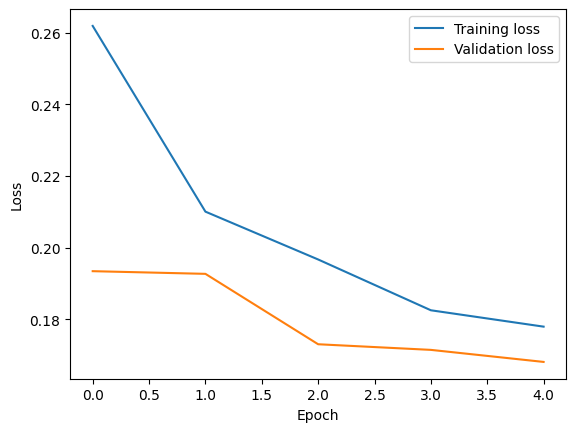

In [ ]:
from torch.utils.data import DataLoader
import time
import matplotlib.pyplot as plt

batch_size = 64 #batch size
lr = 0.0001 #learning rate
num_epochs = 5 #number of epochs
eval_every = 1

# Create dataloaders
train_dataloader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, drop_last=True)
val_dataloader = DataLoader(val_dataset, batch_size=batch_size)
test_dataloader = DataLoader(test_dataset, batch_size=batch_size)


# create a model and send it to cuda
model = VGG16_Updated(2) # binary classification
model = model.cuda()

#optimizer
opt = torch.optim.Adam(model.parameters(), lr=lr)
train_loss = []
val_loss = []
for e in range(1, num_epochs+1):
    train_info = train_one_epoch(train_dataloader, opt)
    print("Training: epoch: {}, loss: {:.2f}, accuracy: {:.2f} in {:.2f} seconds".format(e, train_info["loss"], 100*train_info["acc"], train_info["time"]))
    train_loss.append(train_info["loss"])
    if e % eval_every == 0:
        val_info = test_val_one_epoch(val_dataloader)
        print("Validation: epoch: {}, loss: {:.2f}, accuracy: {:.2f} in {:.2f} seconds".format(e, val_info["loss"], 100*val_info["acc"], val_info["time"]))
        val_loss.append(val_info["loss"])
# plotting the losses
plt.plot(train_loss, label='Training loss')
plt.plot(val_loss, label='Validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


## 8) Test your classifier on Test set

- Apply same pre-processing as training data (Do not pre-process with data augmentation here, pre-processing refers to operations like resizing, normalization)
- Predict the labels of testing data **using the best model that you have selected according to your validation results** and report the accuracy.
- Construct a csv file with test predictions and submit it to SuCourse.

Please name the first column image_name and keep the name of the attributes as it is. (Do not change the order of the attributes). Name this file **submission.csv**

In [ ]:
# Import necessary libraries
import pandas as pd
import sklearn.metrics as metrics

# Set model to evaluation mode
model.eval()

# Create dataloader for the test set
test_loader = DataLoader(test_dataset, batch_size=batch_size)

# Create empty lists to store predicted and true labels
predicted_labels = []
true_labels = []

# Turn off gradient calculation
with torch.no_grad():
    # Iterate through the test data in batches
    for i, data in enumerate(test_loader):
        # Extract images and labels from the batch
        images = data["img"]
        labels = data["label"]
        images = images.cuda()
        labels = labels.cuda()
        # Forward pass through the model to predict labels
        logits = model(images)
        predictions = torch.argmax(logits, dim=1).cpu()
        # Append predicted and true labels to the respective lists
        predicted_labels.extend(predictions.numpy())
        true_labels.extend(labels.cpu().numpy())

# Compute accuracy of the model on the test set
acc = metrics.accuracy_score(true_labels, predicted_labels)

# Print the accuracy
print("Accuracy on Test set: {:.2f}%".format(acc*100))

Accuracy on Test set: 92.63%


In [ ]:
test_preds = pd.DataFrame({"id": [s["img"] for s in test_dataset], "label": predicted_labels})
test_preds.to_csv("test_preds.csv", index=False)

In [ ]:
from google.colab import files
files.download('test_preds.csv')

In [ ]:
from sklearn.metrics import confusion_matrix
#confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)
print(cm)

[[1678   78]
 [ 143 1101]]


##9) Report Your Results

**Notebook should be RUN:** As training and testing may take a long time, we may just look at your notebook results; so make sure **each cell is run**, so outputs are there.

**Report:** Write an **one page summary** of your approach to this problem **below** and copy to the Sucourse answer area a condensed version. Your report should be like an abstract of a paper or the executive summary (you aim for clarity and passing on information, not going to details about known facts such as what CNN is or what transfer learning is, assuming they are known to people in your research area).

Additionally, put the report part of your notebook separately in a PDF document and include a share link to your notebook at the top of your PDF. The pdf is for easy grading.

**Must include statements such as those below:**
**(Remove the text in bullet points, below, and include your own report)**

* Include the **problem definition**: 1-2 lines.

* Talk about your **approach** - the pretrained network and its architecture, changes to the architecture, what is finetuned and for how many epochs...

* Give your **experimental setup** (train/val/test sets, size and how split, samples) and results - along with some analysis of the errors (just take a look at some of your errors and say a few things)

* **Anything else?** You can comment on the speed, computational resources, or anything else that you deem important/interesting.

* You can add **additional visualization as separate pages **if you want, think of them as appendix, keeping the one-page as abstract/summary.


